<a href="https://colab.research.google.com/github/sabrianasistaa/11181069_Sista_DM_IF-ITK/blob/main/Kuis_Penggalian_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KUIS PENGGALIAN DATA**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Berikut adalah data prepararation

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
datairisflo = files.upload()

Saving IRIS.csv to IRIS (2).csv


In [94]:
df = pd.read_csv('IRIS.csv')

iris = df.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.9+ KB


In [96]:
iris.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

Jadi, dapat kita lihat bahwa masing - masing spesies memiliki sebanyak 50 dataset

Setelah mendapatkan hasil dari masing - masing dataset, dicek dahulu apakah data tersebut ada yang duplikat atau tidak

In [97]:
dataset[dataset.duplicated(keep = False)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [99]:
dataset.drop_duplicates(inplace= True)
dataset.shape

(147, 5)

Kemudian, mendeskripsikan dataset yang ada

In [100]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


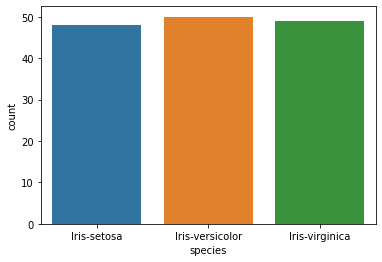

In [101]:
dataset['species'].value_counts()
sns.countplot(data = dataset, x='species')

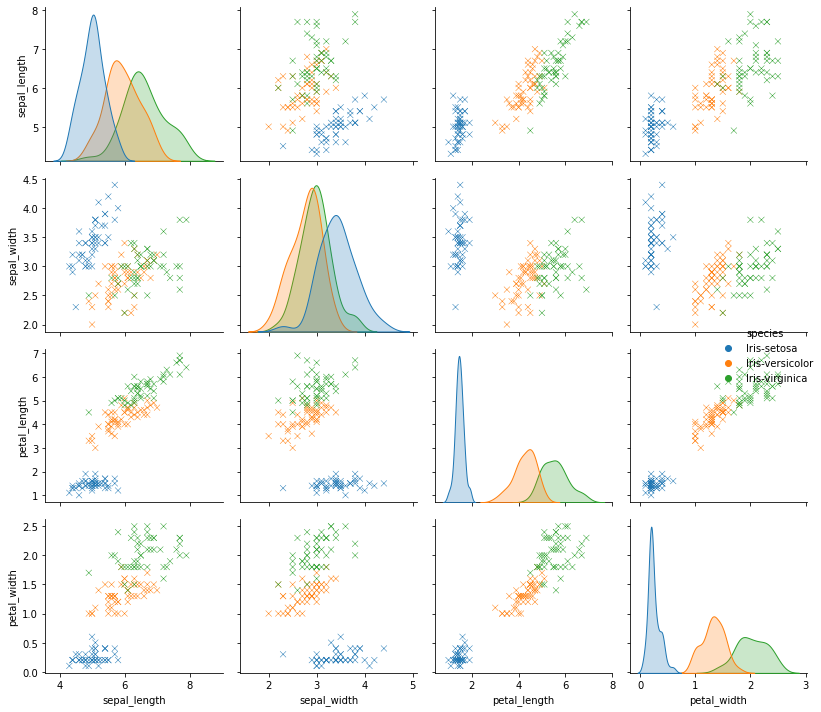

In [102]:
sns.pairplot(data = dataset, hue='species', markers='x')
plt.tight_layout()

**PEMBUATAN MODEL**

In [118]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = dataset.drop(columns='species')
y = dataset['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

**TRAINING DAN TESTING**

MODEL NAIVE BAYES

In [119]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [120]:
y_prediction = naive_bayes_model.predict(X_test)

In [121]:
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

print('Akurasi Naive Bayes: ' + "{:.1%}".format(accuracy_score(y_prediction, y_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
Akurasi Naive Bayes: 96.7%


Jadi, telah di dapatkan bahwa nilai akurasi menggunakan naive bayes adalah 96.7%

MODEL KNN (K NEAREST NEIGHBOUR)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [124]:
yhat = knn.predict(X_test)
yhat[0:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [125]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9487179487179487
Test set Accuracy:  1.0


In [126]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.96666667, 0.96666667, 1.        , 1.        , 1.        ,
       0.96666667, 1.        , 0.93333333, 0.96666667])

PENGUJIAN

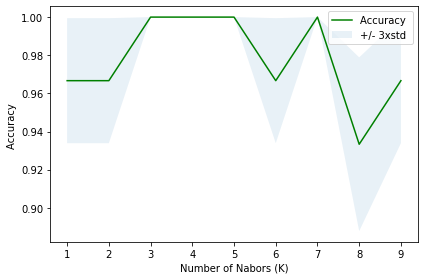

In [127]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [128]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 1.0 with k= 3


In [130]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)  
y_prediction=model_knn.predict(X_test)
print(classification_report(y_test, y_prediction))

from sklearn.metrics import accuracy_score
from __future__ import division
print('Akurasi KNN: ' + "{:.1%}".format(accuracy_score(y_prediction, y_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Akurasi KNN: 100.0%


Jadi, telah di dapatkan bahwa nilai akurasi menggunakan naive bayes adalah 100%

**KESIMPULAN**

Dapat disimpulkan bahwa pada training dan testing pada database IRIS.CSV dengan menggunakan 2 metode. Metode yang digunakan yaitu Metode NBC (Naive Bayes Classifier) dan Metode KNN (K Nearest Neighbour). Sehingga, didapatkan akurasi tertinggi yaitu 100% dengan menggunakan metode KNN (K Nearest Neighbour).